<a target="_blank" href="https://colab.research.google.com/github/ENVIRON-ENERGY716/Fall2023/blob/main/Labs/Lab07/Lab07_IntrotoLP_Part1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## **Lab 7 - Intro to LPs in Python with PYOMO**

Learning outcomes for Lab 7:
* Learn how to implement a simple LP in Python using PYOMO;
* Solve the chemical solution example we explored in the lectures.


Recall you have two machines A and B and you can produce two types of chemical solutions for CO2 capture. Profit from producing type I is \$800 and type II \$600. The units produced are constrained by machine availability. You only have 60 hours in machine A and 48 in machine B.

* Type I requires 4h in MA and 2h in MB
* Type II requires 2h in MA and 4h in MB

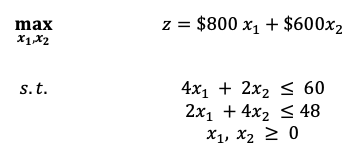

This is a small instance with 2 decision variables and 2 constraints. We will explore two ways to implement this model to get you familiar with the Pyomo environment. But keep in mind that for larger models, there are other ways to do it and we will explore them in upcoming labs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

## Installing and Running Pyomo on Google Colab

To import/install a library that's not in Colaboratory by default, you can use !pip install. This needs to be done at the begining of you notebook. And you only need to run it once at the start of each Colab session.

In [ ]:
!pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00


## Installing optimization solver

Pyomo does not include any optimization solvers. Therefore, you will need to install third-party solvers to solve optimization models built with Pyomo. There are several solver options, for this class we will use glpk and/or cbc.
We'll install glpk using apt-get.

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

## Import Pyomo and solver

The first step in any Pyomo project is to import relevant components of the Pyomo library. This can be done with the following python statement 'from pyomo.environ import *'. \\

We use the * symbol to elimate the need of using the expression pyomo.environ every time we need to use a pyomo function. \\

You also need to load the solver. The Pyomo libary includes a SolverFactory() class used to specify a solver. Here you have two options.
* **cbc** from Coin OR or
* **glpk** \\

Both solvers will work for linear problems, put cbc could also be used for nonlinear applications. Let's use glpk today.

In [ ]:
from pyomo.environ import *
#Import solver
opt=SolverFactory('glpk')

## Create Model

The next thing you need to do is initialize the model. The are two options with Pyomo for model building: AbstractModel() and ConcreteModel(). The file “PyomoFundamentals.pdf” will explain the differences in details. In a nutshell concrete models are immediately constructed and data is presented when components like variables, constraints and objective function are created. The abstract model is useful when you will run the same optimization model for different data sets, or when you will import data that is stored in a excel spreadsheet. You can create an abstract model even before entering/importing the data set.

For the chemical solutions example, since we already have all the data we need, let’s build a concrete model. Let’s create the model and name it “model” using the following command.


In [ ]:
#Creating model
model = ConcreteModel()

## Add model components

The first components we will add to the model are the decision variables. We will use class Var() to specify the variable type using the domain argument. The number of units type I and II will be a continuous number greater than equal to zero.

In [ ]:
#Adding decision variables
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)
#model.x2 = Var(domain=Reals,bounds=(0,None))  #alternative way to define variables

The domain argument could also be used to specify other type of variables like Real, Integers and Booleans. The class Var() has also an argument to set bounds on decision variables, for example Var(domain=Reals, bounds=(0,None)) is the same of defining domain equal NonNegativeReals. \\

The second component we will add is objective function. Recall an objective function is an expression involving decision variables. We will store it in model.profit and use the class Objective() to define the expression and sense of the optimization model.


In [ ]:
#Adding objective function
model.profit = Objective(expr = 800*model.x1 + 600*model.x2, sense=maximize)

The third component we will add is the constraints using the class Constraint(). The expression is specified using the argument expr.

In [ ]:
#Adding constraints
model.machA = Constraint(expr = 4*model.x1 + 2*model.x2 <= 60)
model.machB = Constraint(expr = 2*model.x1 + 4*model.x2 <= 48)

## Solve the model

We already specified the solver now all we need to do is call solve(). The solve() method attempts to solve the model using the specified solver. And you can add a few lines to print the results as below.

In [ ]:
#Solve Model
results = opt.solve(model)

#Print results
print('Profit = ', model.profit())
print('\nDecision Variables')
print('x1 = ', model.x1())
print('x2 = ', model.x2())

Profit =  13200.0

Decision Variables
x1 =  12.0
x2 =  6.0


In [ ]:
print('\nConstraints')
print('Mach A = ', model.machA())
print('Mach B = ', model.machB())


Constraints
Mach A =  60.0
Mach B =  48.0


In [ ]:
#results.write()
if results.solver.status == 'ok':
    model.pprint()

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  12.0 :  None : False : False : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   6.0 :  None : False : False : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 800*x1 + 600*x2

2 Constraint Declarations
    machA : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 4*x1 + 2*x2 :  60.0 :   True
    machB : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 2*x1 + 4*x2 :  48.0 :   True

5 Declarations: x1 x2 profit machA machB


## Plotting the solution

We can utilize `matplotlib` in such 2-variable problems to visualize the feasible region and the solution.

Text(0, 0.5, '$x_2$')

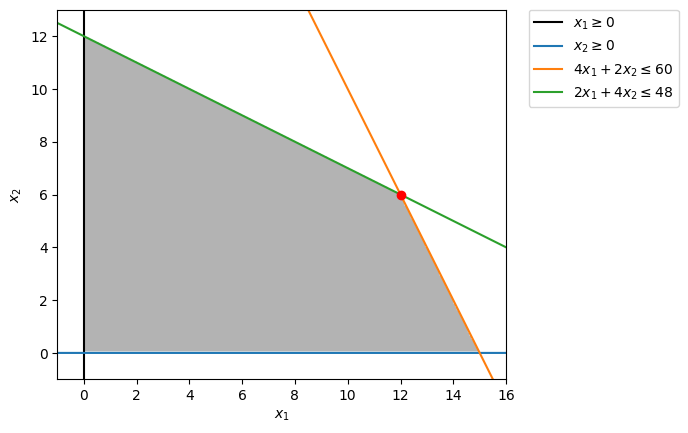

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

plt.imshow( ((y>=0) & (x>=0) & (4*x + 2*y <= 60) & (2*x + 4*y <= 48)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 16, 2000)
# x1 >= 0
y1 = (x*0) + 0
# 2y <= 25 - x
y2 = (60-4*x)/2.0
# 4y >= 2x - 8
y3 = (48-2*x)/4.0

# Make plot
plt.axvline(x = 0, color = 'k', label=r'$x_1 \geq 0$')
plt.plot(x, y1, label=r'$x_2 \geq 0$')
plt.plot(x, y2, label=r'$4x_1 + 2x_2 \leq 60$')
plt.plot(x, y3, label=r'$2x_1 + 4x_2 \leq 48$')
plt.xlim(-1,16)
plt.ylim(-1,13)
plt.plot(model.x1(), model.x2(), 'or')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')


## How to get shadow prices?

Access to shadow prices values is similar to accessing decision variables values, except that shadow prices are not captured by default so additional specifications are needed before solving the model to signal that shadow prices are desired. The dual suffix is where you can access shadow prices.

In [ ]:
#calculating shadow prices
model.dual=Suffix(direction=Suffix.IMPORT)

Then all you need to do is solve the model and print results plus shadow prices.

In [ ]:
#Solve Model
results = opt.solve(model)

print("Shadow Prices")
model.dual.pprint()

Shadow Prices
dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key   : Value
    machA : 166.666666666667
    machB : 66.6666666666667


## Exercise 1

Change the model to incorporate a new constraint that says total number of units type I and type II cannot exceed 15. Create a new model and call it 'model2'. Solve the model.


In [ ]:
#your model

## Exercise 2

Change the model to incorporate a new constraint that says total number of units type I cannot exceed 11. Create a new model and call it 'model3'. Solve the model.

In [ ]:
#your model